In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv(r'Data_Train.csv')

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Checking missing values 

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Data Cleaning 

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def change_to_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_to_datetime(i)

C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\pandas\core\tools\datetimes.py:1047: UserWarn

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year

In [15]:
train_data.drop('Date_of_Journey',axis= 1, inplace= True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-04-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-04-29 05:50:00,2022-04-29 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-04-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-04-29 18:05:00,2022-04-29 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-04-29 16:50:00,2022-04-29 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [17]:
def extract_hour(df,col):
    df[col + '_hour'] = df[col].dt.hour
    
def extract_minute(df,col):
    df[col + '_minute'] = df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis = 1, inplace = True)
    

In [18]:
extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [19]:
extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [21]:
duration = list(train_data['Duration'])

In [22]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
            
        else:
            duration[i] = '0h '  + duration[i] 
              

In [23]:
train_data['Duration'] = duration

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [25]:
def hours(x):
    return x.split(' ')[0][0:-1]


def min(x):
    return x.split(' ')[-1][0:-1]


In [26]:
train_data['Duration_hours']=train_data['Duration'].apply(hours)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [28]:
#drop_column(train_data,'Duration')

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [30]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [31]:
#train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [32]:
train_data.drop('Duration', axis= 1, inplace= True)

In [33]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

# Extract Catagorical Feature

In [34]:
cat_col = [col for col in train_data.columns if train_data[col].dtypes == 'O']

In [35]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [36]:
cont_col = [col for col in train_data.columns if train_data[col].dtypes != 'O']

In [37]:
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

# Nominal Data - data which is not in any order (' One hot Encoding') 
# Ordinary Data - data which is in order ('Label Encoding')

In [38]:
catagorical_data = train_data[cat_col]

In [39]:
catagorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info


In [40]:
catagorical_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

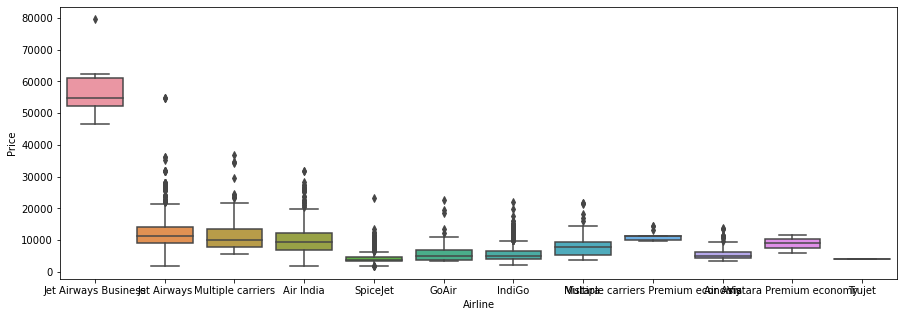

In [41]:
plt.figure(figsize=(15,5))
sn.boxplot(x = 'Airline', y= 'Price', data= train_data.sort_values('Price', ascending = False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

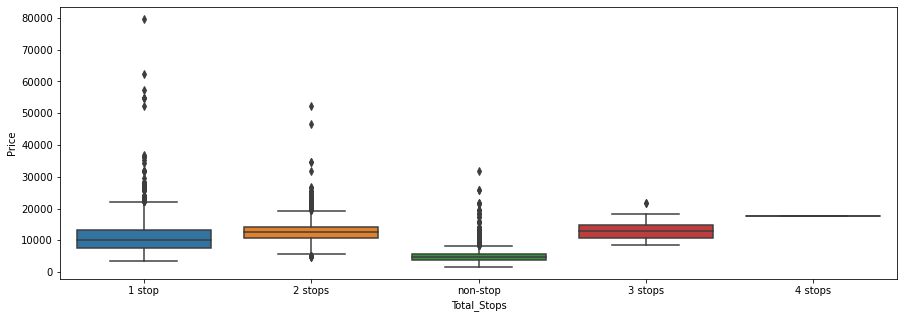

In [42]:
plt.figure(figsize=(15,5))
sn.boxplot(x = 'Total_Stops', y= 'Price', data= train_data.sort_values('Price', ascending = False))

# One Hot Encoding 

In [43]:
Airline = pd.get_dummies(catagorical_data,'Airline', drop_first= True)

In [44]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Airline_non-stop,Airline_1 Short layover,Airline_2 Long layover,Airline_Business class,Airline_Change airports,Airline_In-flight meal not included,Airline_No Info,Airline_No check-in baggage included,Airline_No info,Airline_Red-eye flight
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
catagorical_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

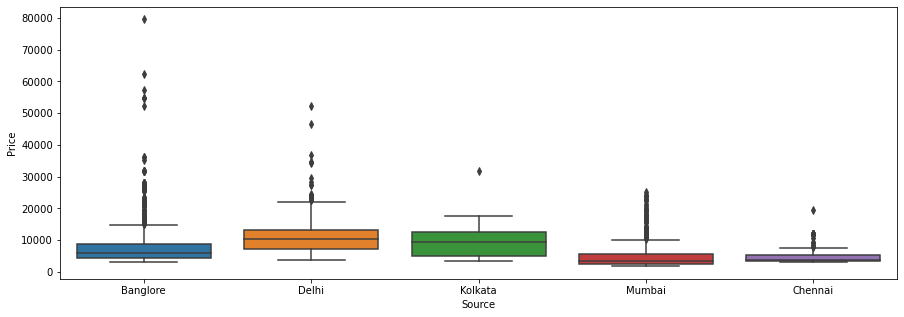

In [46]:
plt.figure(figsize=(15,5))
sn.boxplot(x = 'Source', y= 'Price', data= train_data.sort_values('Price', ascending = False))

In [47]:
Source = pd.get_dummies(catagorical_data,'Source', drop_first= True)
Source.head()

,Source_Air India,Source_GoAir,Source_IndiGo,Source_Jet Airways,Source_Jet Airways Business,Source_Multiple carriers,Source_Multiple carriers Premium economy,Source_SpiceJet,Source_Trujet,Source_Vistara,...,Source_non-stop,Source_1 Short layover,Source_2 Long layover,Source_Business class,Source_Change airports,Source_In-flight meal not included,Source_No Info,Source_No check-in baggage included,Source_No info,Source_Red-eye flight
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
catagorical_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

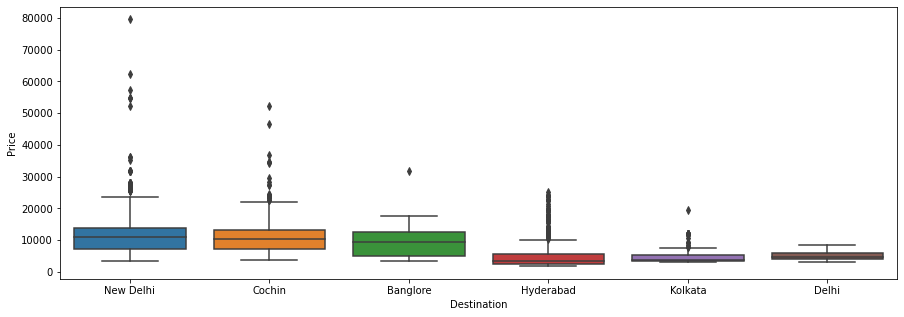

In [49]:
plt.figure(figsize=(15,5))
sn.boxplot(x = 'Destination', y= 'Price', data= train_data.sort_values('Price', ascending = False))

In [50]:
Destination = pd.get_dummies(catagorical_data,'Destination', drop_first= True)
Destination.head()

,Destination_Air India,Destination_GoAir,Destination_IndiGo,Destination_Jet Airways,Destination_Jet Airways Business,Destination_Multiple carriers,Destination_Multiple carriers Premium economy,Destination_SpiceJet,Destination_Trujet,Destination_Vistara,...,Destination_non-stop,Destination_1 Short layover,Destination_2 Long layover,Destination_Business class,Destination_Change airports,Destination_In-flight meal not included,Destination_No Info,Destination_No check-in baggage included,Destination_No info,Destination_Red-eye flight
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
catagorical_data['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [52]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [53]:
catagorical_data['Route_1'] = catagorical_data['Route'].str.split('→').str[0]
catagorical_data['Route_2'] = catagorical_data['Route'].str.split('→').str[1]
catagorical_data['Route_3'] = catagorical_data['Route'].str.split('→').str[2]
catagorical_data['Route_4'] = catagorical_data['Route'].str.split('→').str[3]
catagorical_data['Route_5'] = catagorical_data['Route'].str.split('→').str[4]

In [54]:
catagorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR ? DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU ? IXR ? BBI ? BLR,NaN,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL ? LKO ? BOM ? COK,NaN,NaN,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU ? NAG ? BLR,NaN,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR ? NAG ? DEL,NaN,NaN,NaN,NaN


In [55]:
drop_column(catagorical_data,'Route')

In [56]:
catagorical_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2            10682
Route_3            10682
Route_4            10682
Route_5            10682
dtype: int64

In [57]:
catagorical_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [58]:
for i in ['Route_2', 'Route_3', 'Route_4','Route_5']:
    catagorical_data[i].fillna('None', inplace= True)

In [59]:
catagorical_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [60]:
for i in catagorical_data.columns:
    print('{} has total {} catagories'.format(i,len(catagorical_data[i].value_counts())))

Airline has total 12 catagories
Source has total 5 catagories
Destination has total 6 catagories
Total_Stops has total 5 catagories
Additional_Info has total 10 catagories
Route_1 has total 128 catagories
Route_2 has total 1 catagories
Route_3 has total 1 catagories
Route_4 has total 1 catagories
Route_5 has total 1 catagories


# Label Encoding 

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder = LabelEncoder()

In [63]:
catagorical_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [64]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    catagorical_data[i] = encoder.fit_transform(catagorical_data[i])

In [65]:
catagorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,18,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,No info,84,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,No info,118,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,91,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,No info,29,0,0,0,0


In [66]:
drop_column(catagorical_data,'Additional_Info')

In [67]:
catagorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
dict = {'non-stop':0 , '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops':4}

In [69]:
catagorical_data['Total_Stops'] = catagorical_data['Total_Stops'].map(dict)

In [70]:
catagorical_data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,18,0,0,0,0
1,Air India,Kolkata,Banglore,2,84,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,118,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,91,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,29,0,0,0,0


In [71]:
data_train = pd.concat([catagorical_data,Airline,Source,Destination,train_data[cont_col]],axis= 1)

In [72]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,...,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,18,0,0,0,0,0,...,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,84,0,0,0,0,1,...,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,118,0,0,0,0,0,...,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,91,0,0,0,0,0,...,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,29,0,0,0,0,0,...,13302,3,1,2019,16,50,21,35,4,45


In [73]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [74]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,18,0,0,0,0,0,0,1,0,...,3897,24,3,2019,22,20,1,10,2,50
1,2,84,0,0,0,0,1,0,0,0,...,7662,5,1,2019,5,50,13,15,7,25
2,2,118,0,0,0,0,0,0,0,1,...,13882,6,9,2019,9,25,4,25,19,0
3,1,91,0,0,0,0,0,0,1,0,...,6218,5,12,2019,18,5,23,30,5,25
4,1,29,0,0,0,0,0,0,1,0,...,13302,3,1,2019,16,50,21,35,4,45


In [75]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,...,Destination_Business class,Destination_Change airports,Destination_In-flight meal not included,Destination_No Info,Destination_No check-in baggage included,Destination_No info,Destination_Red-eye flight,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3897,24,3,2019,22,20,1,10,2,50
1,2,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,7662,5,1,2019,5,50,13,15,7,25
2,2,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,13882,6,9,2019,9,25,4,25,19,0
3,1,91,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,6218,5,12,2019,18,5,23,30,5,25
4,1,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,13302,3,1,2019,16,50,21,35,4,45


In [76]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sn.distplot(df[col],ax= ax1)
    sn.boxplot(df[col],ax= ax2)

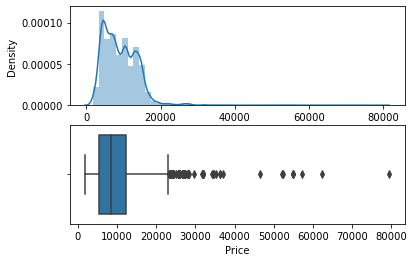

In [77]:
plot(data_train,'Price')

#  Handling Outliers

In [78]:
data_train['Price'] = np.where(data_train['Price'] >= 40000, data_train['Price'].median(), data_train['Price'])

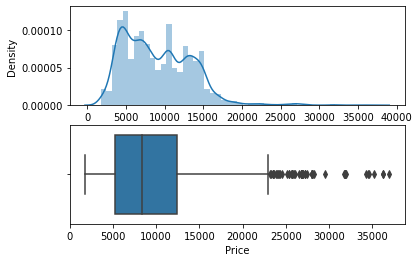

In [79]:
plot(data_train,'Price')

In [80]:
X = data_train.drop('Price',axis= 1)

In [81]:
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,...,Destination_2 Long layover,Destination_Business class,Destination_Change airports,Destination_In-flight meal not included,Destination_No Info,Destination_No check-in baggage included,Destination_No info,Destination_Red-eye flight,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,24,3,2019,22,20,1,10,2,50
1,2,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,5,1,2019,5,50,13,15,7,25
2,2,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6,9,2019,9,25,4,25,19,0
3,1,91,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,5,12,2019,18,5,23,30,5,25
4,1,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,1,2019,16,50,21,35,4,45


In [82]:
X.shape

(10682, 495)

In [83]:
y = data_train['Price']

In [84]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

# Feature Selection 

In [85]:
from sklearn.feature_selection import mutual_info_classif

In [86]:
mutual_info_classif(X,y)

array([2.13855858e+00, 3.36824644e+00, 0.00000000e+00, 1.24557889e-02,
       1.94621856e-03, 2.02964117e-02, 7.64822406e-01, 9.24953404e-02,
       6.80050019e-01, 9.29326381e-01, 0.00000000e+00, 5.67338703e-01,
       6.42358650e-03, 3.30544534e-01, 3.00746772e-03, 2.37411405e-01,
       0.00000000e+00, 1.75404117e-01, 1.55103359e+00, 8.90153633e-01,
       2.93058079e-01, 1.53471768e+00, 4.05171769e-01, 3.15236698e-01,
       1.57156614e-01, 3.62669802e-01, 0.00000000e+00, 8.33161646e-03,
       8.69440864e-03, 4.59035333e-03, 1.79244410e-01, 5.61878329e-03,
       0.00000000e+00, 7.22861995e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.13193841e-02, 0.00000000e+00, 8.11935242e-03, 5.31337038e-01,
       0.00000000e+00, 5.37095168e-03, 0.00000000e+00, 0.00000000e+00,
       4.29558134e-03, 1.41189400e-02, 4.30158608e-03, 0.00000000e+00,
       2.20248564e-03, 1.35118799e-02, 8.28760579e-03, 4.21921228e-03,
      

In [87]:
imp = pd.DataFrame(mutual_info_classif(X,y),index= X.columns)

In [88]:
imp

,0
Total_Stops,2.128663
Route_1,3.336603
Route_2,0.006887
Route_3,0.017260
Route_4,0.010800
...,...
Dep_Time_minute,1.209313
Arrival_Time_hour,1.843132
Arrival_Time_minute,1.540202
Duration_hours,1.792561


In [89]:
imp.columns=['importance']
imp.sort_values(by = 'importance', ascending = False )

,importance
Route_1,3.336603
Total_Stops,2.128663
Airline_No info,2.020033
Destination_No info,2.003177
Source_No info,1.958034
...,...
Source_CCU ? BOM ? HBX ? BLR,0.000000
Source_CCU ? DEL ? COK ? TRV ? BLR,0.000000
Source_CCU ? DEL ? VGA ? BLR,0.000000
Source_CCU ? GAU ? IMF ? DEL ? BLR,0.000000


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 )

In [92]:
from sklearn import metrics

def predict_model(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score is : {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are : \n {}'.format(y_prediction))
    print("\n")
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    print("r2 score is :{}".format(r2_score))
    
    print("MAE :",metrics.mean_absolute_error(y_test,y_prediction))
    print("MSE: ",metrics.mean_squared_error(y_test,y_prediction))
    print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sn.distplot(y_test- y_prediction)

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Prediction with all the Algorithms 

Training score is : 0.9857323046766107
Predictions are : 
 [16385.62       10368.87        7812.80333333 ... 15255.62
 14590.45       10498.18      ]


r2 score is :0.9023750613872278
MAE : 597.786027775752
MSE:  1872615.134809846
RMSE:  1368.435287037661


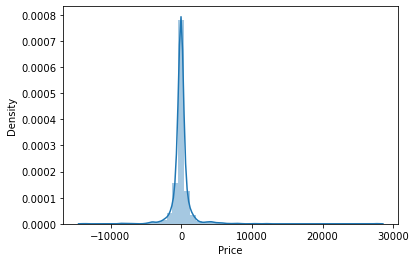

In [94]:
predict_model(RandomForestRegressor())

Training score is : 0.08320655354008193
Predictions are : 
 [ 4823.  9663.  3943. ...  3850.  9663. 10368.]


r2 score is :-0.23621252488531175
MAE : 3407.110903135236
MSE:  23712693.87552644
RMSE:  4869.568140556865


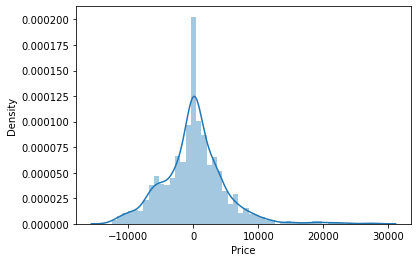

In [95]:
predict_model(LogisticRegression())

Training score is : 0.8063893529324468
Predictions are : 
 [14688.6 10010.2 10335.4 ... 14642.6 13762.6 11432.4]


r2 score is :0.6789068902192625
MAE : 1625.8262049602247
MSE:  6159121.07708002
RMSE:  2481.7576588136117


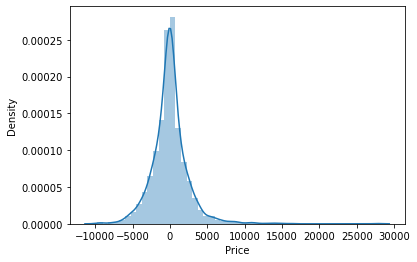

In [96]:
predict_model(KNeighborsRegressor())

Training score is : 0.996069573508808
Predictions are : 
 [14815. 10676.  7832. ... 14714. 14571. 10368.]


r2 score is :0.8098686517059854
MAE : 681.0628607081578
MSE:  3647048.03379608
RMSE:  1909.7245963217


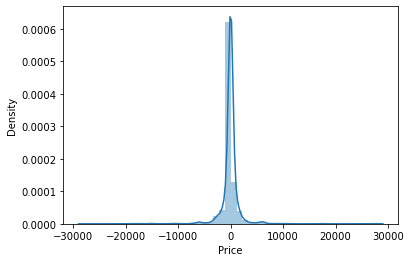

In [97]:
predict_model(DecisionTreeRegressor())

Training score is : 0.5529549444119368
Predictions are : 
 [17261. 10676.  7832. ... 16079. 14781. 10368.]


r2 score is :0.7605983437137542
MAE : 1086.6691623771642
MSE:  4592137.738886289
RMSE:  2142.927376017743


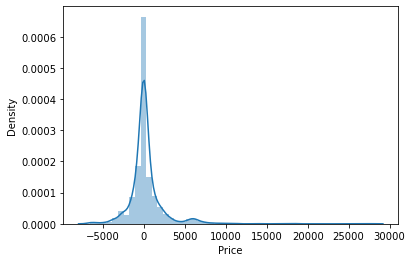

In [98]:
predict_model(GaussianNB())

Training score is : 0.7416466544955631
Predictions are : 
 [16434.83984375  9656.54101562 12127.76367188 ... 13282.87011719
 13698.32788086 10827.03564453]


r2 score is :-504719027973947.44
MAE : 4195841503.614603
MSE:  9.681383712408063e+21
RMSE:  98394022747.36034


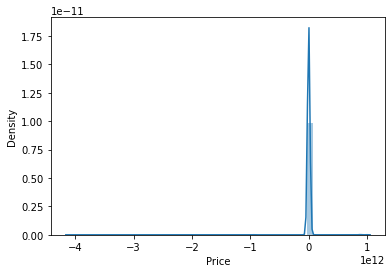

In [99]:
predict_model(LinearRegression())